In [2]:
%matplotlib inline

from os import path
import os
import sys
sys.path.insert(0, path.abspath('../'))

from src.mcmc import Chain

In [3]:
exp_path = "data/data.pkl"
model_par = "preds/modelDesign.txt"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par)


[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.pkl
[INFO][mcmc] Loading the model parameters space from preds/modelDesign.txt ...


[INFO][mcmc] Run MCMC with emcee...
[INFO][mcmc] Loading the experiment data from data/data.pkl ...
[INFO][mcmc] Experimental dataset size: 140


In [4]:
folder = "trained_emulators_no_PCA/"
emuPathList = [
    folder+"hadrons_train_PCSK_trained.sav",
    folder+"pions_train_PCSK_trained.sav",
    folder+"kaons_train_PCSK_trained.sav",
    folder+"protons_train_PCSK_trained.sav",
]
mymcmc.loadEmulator(emuPathList)

[INFO][mcmc] Number of Emulators: 4


In [5]:
os.environ["OMP_NUM_THREADS"] = "1"
# may have to: export RDMAV_FORK_SAFE=1 before running the code

n_effective=8000
n_active=4000
n_prior=16000
sample="tpcn"
n_max_steps=100
random_state=42

n_total = 50000
n_evidence = 0

pool = 12

sampler = mymcmc.run_pocoMC(n_effective=n_effective, n_active=n_active,
                            n_prior=n_prior, sample=sample,
                            n_max_steps=n_max_steps, random_state=random_state,
                            n_total=n_total, n_evidence=n_evidence, pool=pool)


[INFO][mcmc] Generate the prior class for pocoMC ...
[INFO][mcmc] Starting pocoMC ...


Iter: 40it [55:28, 83.22s/it, beta=1, calls=702000, ESS=49279, logZ=-200, logP=-175, acc=0.742, steps=3, eff=1]         

[INFO][mcmc] Generate the posterior samples ...


[INFO][mcmc] Generate the evidence ...
Log evidence:  -199.9893007378884
Log evidence error:  0.0037858260803364245
[INFO][mcmc] Writing pocoMC chains to file...


Posterior Analysis

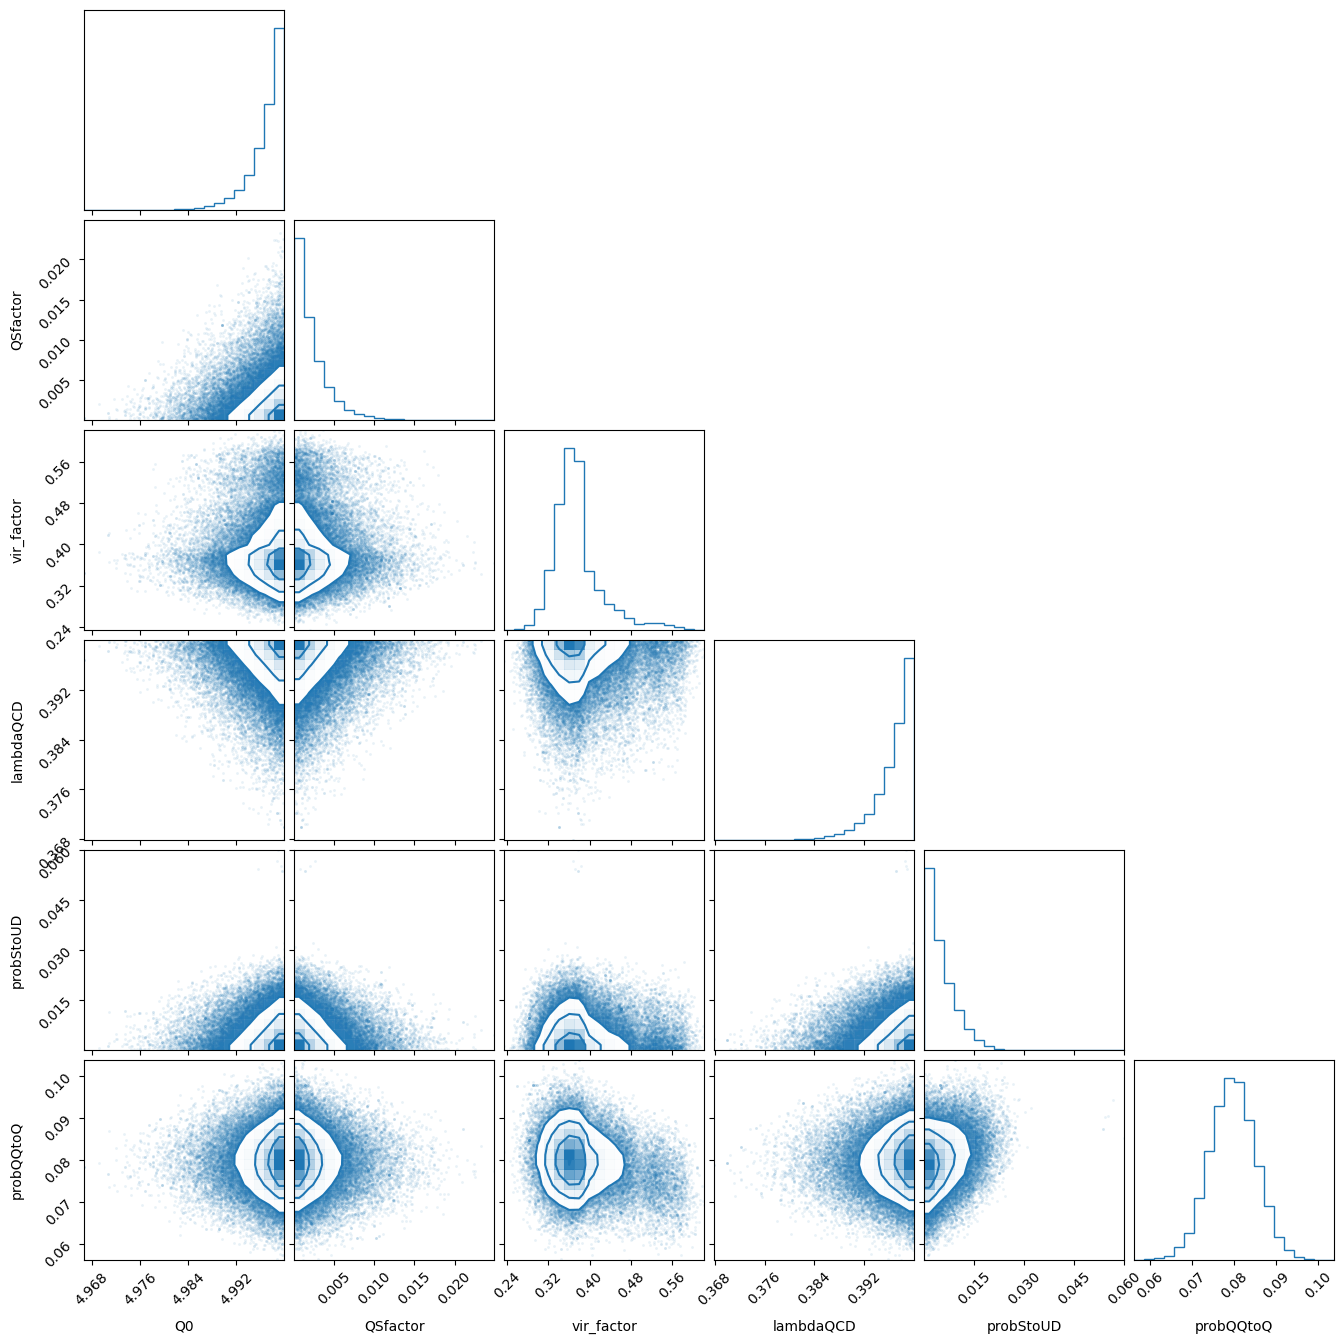

Q0: 4.998-0.008+0.002
QSfactor: 0.002-0.002+0.006
vir_factor: 0.370-0.056+0.133
lambdaQCD: 0.397-0.008+0.002
probStoUD: 0.004-0.004+0.011
probQQtoQ: 0.080-0.010+0.010


In [13]:
import pickle
import corner
import matplotlib.pyplot as plt
import numpy as np

def extract_parameters(data_array):
    samples = data_array.reshape((-1,data_array.shape[-1]))

    for param_index in range(samples.shape[-1]):
        percentiles1 = np.percentile(samples[:, param_index], [5, 50, 95])
        median1, lower1, upper1 = percentiles1[1], percentiles1[1]-percentiles1[0], percentiles1[2] - percentiles1[1]
        print(f"{labels[param_index]}: {median1:.3f}-{lower1:.3f}+{upper1:.3f}")
        
with open('mcmc/chain.pkl', 'rb') as pf:
        data = pickle.load(pf)

labels = mymcmc.label

fig = corner.corner(data['chain'], weights=data['weights'], labels=labels, color="C0")
plt.show()

extract_parameters(data['chain'])